<a href="https://colab.research.google.com/github/ShakedZrihen/worldwide-song-hit-formula/blob/master/canWePredictANewHitInIsrael.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Top music hits based on spottify top 200 weekly charts**

Our question of research is - What makes a song a hit in a given country. We will try to predict if a given song given it's features will become a top hit.

In attempt to answer this question we will try to identify some features that might affect a song's popularity based on it's number of streams.

In [53]:
from google.colab import drive
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Data collection and processing

### Get top 200 charts from Spotify

After we realized that the top 200 track charts didnt have any API, we built a crawler that download the CSV file from each week from 2018 to current.

we downloaded date for all 60 countries that spotify have charts on but for this study case we will analize only Israel charts.

you can see the process on our [github project](https://github.com/ShakedZrihen/worldwide-song-hit-formula).

### Merge data and add extra features

After we finished with data collection, we fetched from Spotify API featueres for each song. we created a CSV that holds the uniqe songs with song features and merge it with the merged week csv we downloaded.

We got artists extra data (genre, gender, country) from both Spotify API and MusicBrainz API.

### Missing data
* Add extra data for each Artist like popularity and activity period.
* Add some data related to events over the weeks (for example COVID time, seasons, special events, etc)



In [7]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [68]:
israel_hits = pd.read_csv('/content/gdrive/MyDrive/OpenUniversity/DS/finalDataset/israel_hits.csv')
israel_hits.set_index(['URL'], inplace=True)
israel_hits.head()

,Artist,Position,Streams,Track Name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,week,artist's country,artist type,gender,genre
URL,,,,,,,,,,,,,,,,,,,,,
https://open.spotify.com/track/2XW4DbS6NddZxRPm5rMCeY,Drake,1,24431,God's Plan,0.758,0.448,G,-9.441,1,0.1030,0.03090,0.000087,0.558,0.373,77.176,198960,2018-03-09,Canada,Person,male,boy band
https://open.spotify.com/track/1xznGGDReH1oQq0xzbwXa3,Drake,152,2178,One Dance,0.791,0.619,C#,-5.886,1,0.0532,0.00784,0.004230,0.351,0.371,103.989,173987,2018-03-09,Canada,Person,male,boy band
https://open.spotify.com/track/2XW4DbS6NddZxRPm5rMCeY,Drake,1,49315,God's Plan,0.758,0.448,G,-9.441,1,0.1030,0.03090,0.000087,0.558,0.373,77.176,198960,2018-03-16,Canada,Person,male,boy band
https://open.spotify.com/track/1xznGGDReH1oQq0xzbwXa3,Drake,133,5808,One Dance,0.791,0.619,C#,-5.886,1,0.0532,0.00784,0.004230,0.351,0.371,103.989,173987,2018-03-16,Canada,Person,male,boy band
https://open.spotify.com/track/2XW4DbS6NddZxRPm5rMCeY,Drake,1,51121,God's Plan,0.758,0.448,G,-9.441,1,0.1030,0.03090,0.000087,0.558,0.373,77.176,198960,2018-03-23,Canada,Person,male,boy band


## Basic data set Exploration


In [69]:
israel_hits.shape

(33000, 21)

In [70]:
israel_hits.drop_duplicates(inplace=True)
israel_hits.shape

(33000, 21)

there are no duplicates.

popularity of a song will be calculated like this:
sum of (200 - Position + 1)

In [71]:
calc_pop_df = pd.DataFrame(israel_hits)
calc_pop_df['inverse_pos'] = israel_hits['Position'].apply(lambda x: 200 - x + 1)
droped = calc_pop_df.drop(['Position', 'week', 'Streams'], axis = 1)
gruped = droped.groupby(['URL', 'Track Name', 'Artist'])
calculated = gruped.aggregate(np.sum)
calculated = calculated[['inverse_pos']]

merged = calculated.merge(droped.drop(['inverse_pos'], axis = 1).drop_duplicates(), on='URL')
merged.rename(columns={'inverse_pos': "popularity"}, inplace=True)
merged.sort_values(by='popularity', ascending=False)


,popularity,Artist,Track Name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,artist's country,artist type,gender,genre
URL,,,,,,,,,,,,,,,,,,,
https://open.spotify.com/track/52n4gF126eIllrGuc9Zus6,27099,Ishay Ribo,לשוב הביתה,0.730,0.448,B,-9.074,0,0.0309,0.5100,0.000013,0.0926,0.632,104.007,197481,Israel,Person,male,eurovision
https://open.spotify.com/track/67dg9xeMIRXjcQbmbWtBFW,20590,Hanan Ben Ari,אלוף העולם,0.583,0.433,A#,-8.309,0,0.0501,0.7460,0.000000,0.1330,0.220,127.513,215625,NaN,Person,male,dance pop
https://open.spotify.com/track/5dlEgrCOjy9FTcQM1vrrh5,19125,Eviatar Banai,עד מחר,0.322,0.558,F,-7.165,1,0.0293,0.6280,0.017100,0.1430,0.286,163.074,267467,Israel,Person,male,nz pop
https://open.spotify.com/track/2WBNUsV0WH7Cmjr71viWfC,18056,Eliad,מסע,0.803,0.664,C,-6.890,0,0.0382,0.1160,0.000000,0.0978,0.593,115.022,207228,Israel,Person,male,dance pop
https://open.spotify.com/track/6AuhyP1rKXVGvvrqr5UNaK,17881,Idan Amedi,חלק מהזמן,0.568,0.455,D#,-7.611,0,0.0308,0.6260,0.000000,0.1290,0.641,68.464,223453,Israel,Person,male,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://open.spotify.com/track/5hrXLJJrnKraxRQntH0Vv9,1,The Chainsmokers,Side Effects (feat. Emily Warren),0.662,0.741,G#,-5.256,1,0.0317,0.0013,0.000000,0.5660,0.532,110.032,173840,United States,Group,NaN,dance pop
https://open.spotify.com/track/4zRZAmBQP8vhNPf9i9opXt,1,Why Don't We,8 Letters,0.607,0.478,C#,-5.702,0,0.0310,0.6490,0.000000,0.0928,0.255,88.979,190027,United States,Group,NaN,houston rap
https://open.spotify.com/track/43rA71bccXFGD4C8GOpIlN,1,Taylor Swift,I Forgot That You Existed,0.664,0.316,F,-10.345,1,0.5190,0.2980,0.000002,0.0812,0.541,92.875,170640,United States,Person,female,classic israeli pop


## About the features

|feature | description|
|--------|------------|
|**acousticness**| A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.|
|**danceability**|Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.|
|**duration_ms**|The duration of the track in milliseconds.	|
|**energy**|Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. <br/>For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.|
|**instrumentalness**|Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. <br/>The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.	|
|**key**|The key the track is in|
|**liveness**|Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.|
|**loudness**|The overall loudness of a track in decibels (dB). <be/>Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.<br/> Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.|
|**mode**|Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.|
|**speechiness**|Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. <br/>Values above 0.66 describe tracks that are probably made entirely of spoken words.<br/> Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.|
|**tempo**|The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.|
|**valence**|A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track.<br/> Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).|
|**artist's country**|Home country of the artist|
|**gender**|gender of the artist|
|**genre**|main genre of the artist|

In [72]:
merged.dtypes

popularity            int64
Artist               object
Track Name           object
danceability        float64
energy              float64
key                  object
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
artist's country     object
artist type          object
gender               object
genre                object
dtype: object

In [73]:
df = pd.DataFrame(merged)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2160 entries, https://open.spotify.com/track/003eoIwxETJujVWmNFMoZy to https://open.spotify.com/track/7zhAAoTwVA6Y9tR250xvnd
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        2160 non-null   int64  
 1   Artist            2160 non-null   object 
 2   Track Name        2160 non-null   object 
 3   danceability      2160 non-null   float64
 4   energy            2160 non-null   float64
 5   key               2160 non-null   object 
 6   loudness          2160 non-null   float64
 7   mode              2160 non-null   int64  
 8   speechiness       2160 non-null   float64
 9   acousticness      2160 non-null   float64
 10  instrumentalness  2160 non-null   float64
 11  liveness          2160 non-null   float64
 12  valence           2160 non-null   float64
 13  tempo             2160 non-null   float64
 14  duration_ms       2160 non-null   int64 

##**numeric features**

###**Describe**

In [74]:
df.describe()

,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000,2160.000000
mean,1395.080093,0.668310,0.608120,-6.684143,0.475926,0.106629,0.274314,0.015274,0.180601,0.474136,120.489036,203584.193056
std,2487.299284,0.135244,0.162714,2.409842,0.499536,0.105352,0.256672,0.093387,0.139306,0.212231,27.918130,42207.203675
min,1.000000,0.153000,0.014300,-23.023000,0.000000,0.023200,0.000061,0.000000,0.021500,0.032000,53.280000,30133.000000
25%,97.000000,0.585750,0.498000,-7.863000,0.000000,0.040600,0.059375,0.000000,0.097575,0.316750,98.029500,179193.000000
50%,349.000000,0.680000,0.621000,-6.344000,0.000000,0.060150,0.185000,0.000000,0.124000,0.464000,119.987500,200204.000000
75%,1526.250000,0.761000,0.728000,-5.106500,1.000000,0.127250,0.445250,0.000015,0.213250,0.636500,139.967250,220880.750000
max,27099.000000,0.968000,0.966000,0.175000,1.000000,0.966000,0.993000,0.964000,0.978000,0.982000,205.272000,446887.000000


###**Distribution of the features**

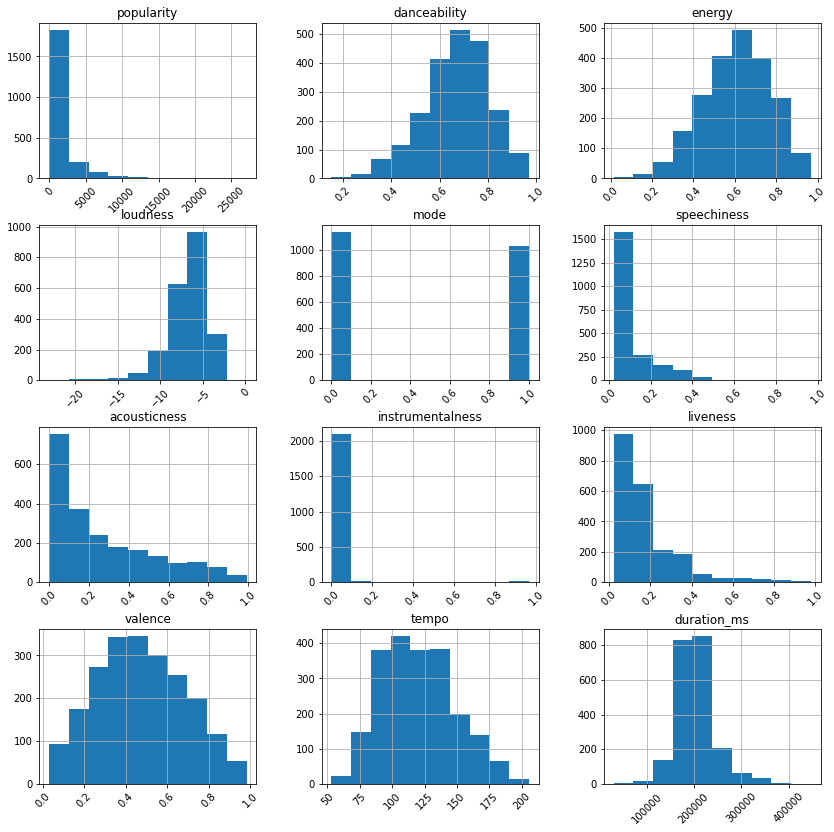

In [75]:
df.hist(figsize=(14,14), xrot=45)
plt.show()

##**Categorical features**

###**Describe**

In [76]:
df.describe(include='object')

,Artist,Track Name,key,artist's country,artist type,gender,genre
count,2160,2160,2160,1902,2123,1703,2071
unique,539,1905,12,36,3,3,138
top,Omer Adam,Better,C#,United States,Person,male,dance pop
freq,62,4,304,830,1726,1273,407


###**Distribution of the features**

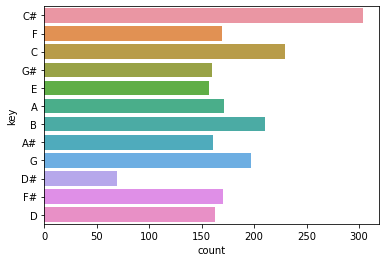

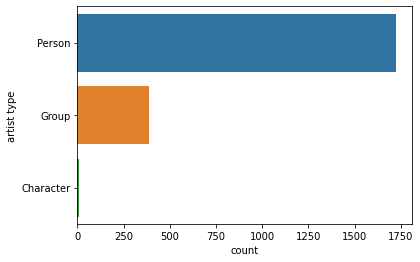

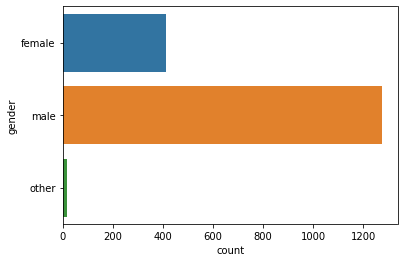

In [77]:
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 13:
        sns.countplot(y=column, data=df)
        plt.show()

We can notice that male artists are more dominnatic than female artists in Israel's top charts..

### **Grouping and segmentation on catagorized features**


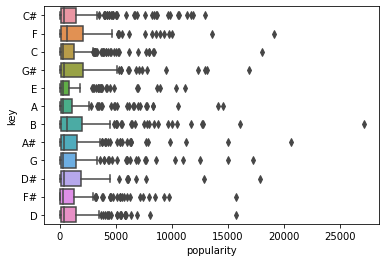

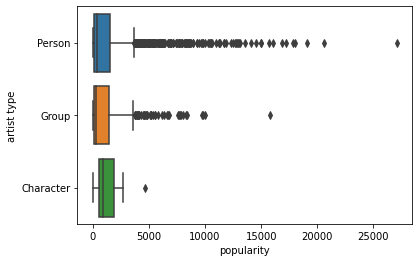

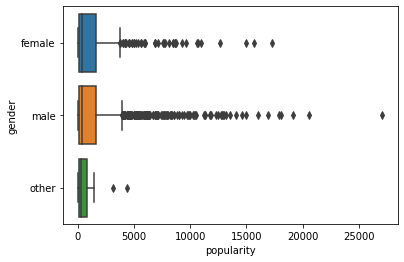

In [78]:
for column in df.select_dtypes(include='object'):
 if df[column].nunique() < 13:
    sns.boxplot(y=column, x='popularity', data=df)
    plt.show()

### **Relationships between numeric features and other numeric features**

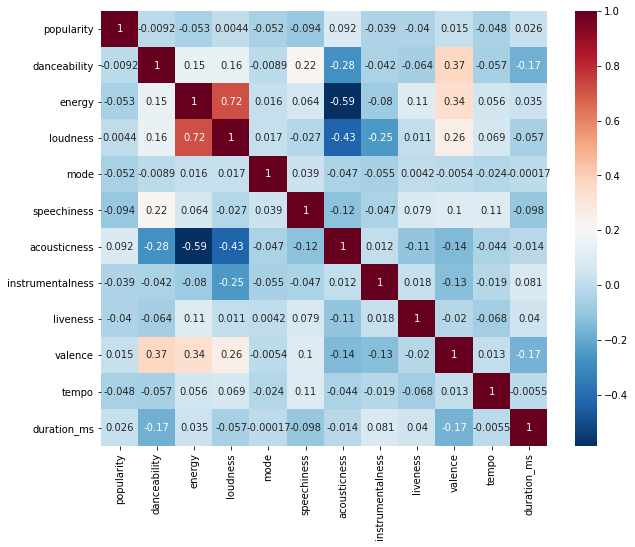

In [79]:
corrs = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', annot=True)
plt.show()

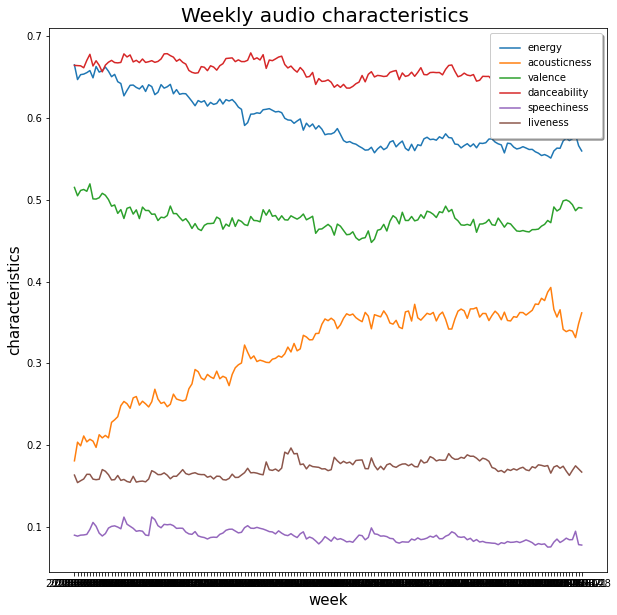

In [98]:
columns = ["energy","acousticness","valence","danceability","speechiness","liveness"]
plt.figure(figsize=(10,10))
for column in columns:
    x = israel_hits.groupby('week')[column].mean()
    sns.lineplot(x=x.index, y=x,label=column)
plt.title('Weekly audio characteristics ', fontsize=20)
plt.xlabel('week',fontsize=15)
plt.ylabel('characteristics',fontsize=15)
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, prop={'size': 10}, loc = 'upper right')
plt.show()

## Predictions - Future work

In our final project we would like to see if we can predict song's success based on it's features.

we will split the data to test and train groups and we will try diffrent algorithm to find if we can predict popularity based on it.

Our final Goal will be to compare multiple countries and search for a combination of features that can predict song succes - in country scope and in general.

